# Création d’un outil d’estimation immobilière basé sur le machine learning : Cas du marché marocain

## Chargement des données

In [169]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [170]:
data=pd.read_csv("appartements-data.csv")
data.head()

,title,price,city_name,salon,nb_rooms,nb_baths,surface_area,equipment,link
0,CMN-MA-1752 - Appartement à vendre à Palmier,2 000 000 DH,Casablanca,NaN,2.0,2.0,168.0,Ascenseur/Balcon/Parking/Terrasse,https://www.avito.ma/fr/palmier/appartements/C...
1,66370-Vente Appt à Casablanca Hay Hassani de 1...,1 195 000 DH,Casablanca,NaN,2.0,2.0,98.0,Ascenseur/Balcon/Chauffage/Climatisation/Cuisi...,https://www.avito.ma/fr/hay_hassani/appartemen...
2,Appartement à vendre 81 m² à Dar Bouazza,1 350 000 DH,Dar Bouazza,1.0,2.0,2.0,81.0,Ascenseur/Balcon/Chauffage/Climatisation/Conci...,https://www.avito.ma/fr/dar_bouazza/appartemen...
3,63860-Vente Appt à Casablanca Quartier Bd Med ...,900 000 DH,Casablanca,NaN,1.0,1.0,56.0,Ascenseur/Chauffage/Climatisation/Cuisine Équi...,https://www.avito.ma/fr/centre_ville/apparteme...
4,Appartement à Rabat Agdal,3 100 000 DH,Rabat,2.0,3.0,2.0,200.0,Ascenseur/Balcon/Concierge/Parking/Sécurité,https://www.avito.ma/fr/agdal/appartements/App...


In [171]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1773 entries, 0 to 1772
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   title         1772 non-null   object 
 1   price         1490 non-null   object 
 2   city_name     1772 non-null   object 
 3   salon         1620 non-null   float64
 4   nb_rooms      1490 non-null   float64
 5   nb_baths      1480 non-null   float64
 6   surface_area  1742 non-null   float64
 7   equipment     1402 non-null   object 
 8   link          1773 non-null   object 
dtypes: float64(4), object(5)
memory usage: 124.8+ KB


## Analyse exploratoire des données (EDA)

In [172]:
data.shape
print(f"Le tableau contient {data.shape[0]} lignes et {data.shape[1]} colonnes ")
nb_lignes_init=data.shape[0]

Le tableau contient 1773 lignes et 9 colonnes 


### Identification des valeurs manquantes

In [173]:
data.isna().sum()

title             1
price           283
city_name         1
salon           153
nb_rooms        283
nb_baths        293
surface_area     31
equipment       371
link              0
dtype: int64

In [174]:
data[data.duplicated()].head()

,title,price,city_name,salon,nb_rooms,nb_baths,surface_area,equipment,link
133,Appartement à vendre 95 m² à Mohammedia,1 470 000 DH,Mohammedia,1.0,2.0,1.0,95.0,NaN,https://www.avito.ma/vi/55462984.htm
233,Appartement à vendre 83 m² à Bouskoura,790 000 DH,Bouskoura,1.0,2.0,83.0,83.0,Ascenseur/Balcon/Concierge/Parking,https://www.avito.ma/vi/53111879.htm
334,Appartements moyenne standing à vendre à Tanger,NaN,Tanger,1.0,NaN,NaN,90.0,Ascenseur/Balcon/Cuisine Équipée/Parking/Sécurité,https://www.avito.ma/vi/55823700.htm
440,Appartement à vendre 217 m² à Casablanca,1 400 000 DH,Casablanca,3.0,3.0,2.0,147.0,Ascenseur/Balcon/Parking/Sécurité/Terrasse,https://www.avito.ma/vi/55595022.htm
476,Appartement de rêve à vendre à Ain Atiq.,8 200 DH,Temara,1.0,3.0,2.0,105.0,Ascenseur/Balcon/Concierge/Cuisine Équipée/Par...,https://www.avito.ma/vi/50972579.htm


In [175]:
doublons=data.duplicated().sum()
print(doublons)

41


### Supprimer les doublons

In [176]:
data_clean = data.drop_duplicates()
print(data_clean.shape)

(1732, 9)


In [177]:
print(f"Nous avons supprimés {doublons} lignes contenant des doublons")

Nous avons supprimés 41 lignes contenant des doublons


## Analyse de la distribution des variables numériques

Analyse de la distribution des salons

In [178]:
data_clean['salon'].value_counts().sort_index()

salon
0.0      14
1.0    1186
2.0     341
3.0      31
4.0       4
5.0       2
8.0       1
Name: count, dtype: int64

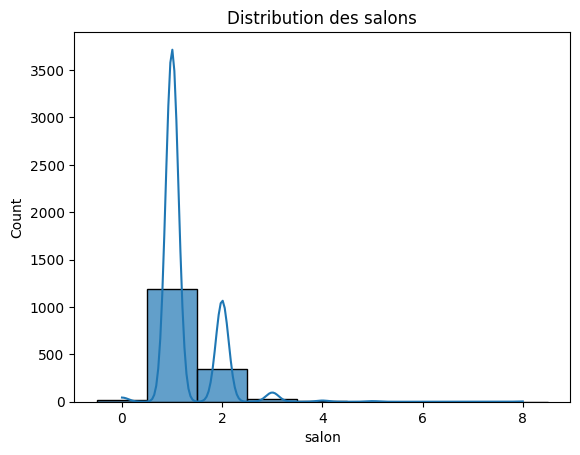

In [179]:
plt.title('Distribution des salons')
sns.histplot(data=data_clean,discrete=True, x='salon',shrink=1, kde=True, alpha=0.7)
plt.show()

Analyse de la distribution nb_rooms

In [180]:
data_clean['nb_rooms'].value_counts().sort_index()

nb_rooms
1.0     78
2.0    805
3.0    517
4.0     50
5.0      1
6.0      2
7.0      1
Name: count, dtype: int64

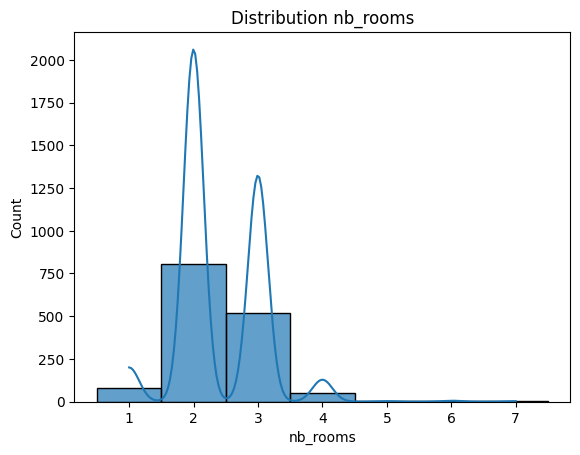

In [181]:
plt.title('Distribution nb_rooms')
sns.histplot(data=data_clean,discrete=True, x='nb_rooms',shrink=1, kde=True, alpha=0.7)
plt.show()

Analyse de la distribution nb_baths

In [182]:
data_clean['nb_baths'].value_counts().sort_index()

nb_baths
0.0        5
1.0      577
2.0      751
3.0       94
4.0        5
5.0        1
6.0        1
57.0       1
60.0       1
70.0       1
77.0       1
83.0       2
90.0       1
110.0      1
113.0      1
134.0      1
Name: count, dtype: int64

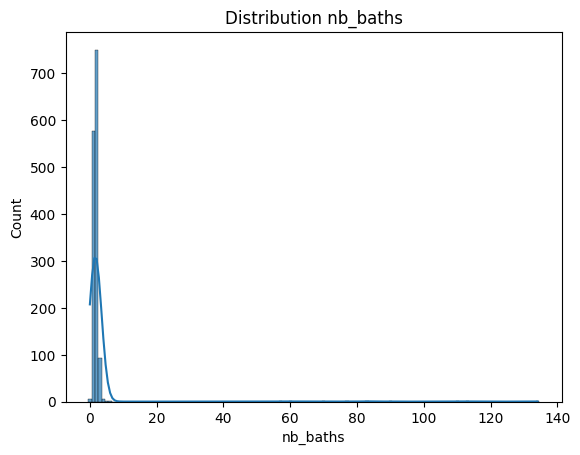

In [183]:
plt.title('Distribution nb_baths')
sns.histplot(data=data_clean,discrete=True, x='nb_baths',shrink=1, kde=True, alpha=0.7)
plt.show()

Analyse de la distribution surface_area

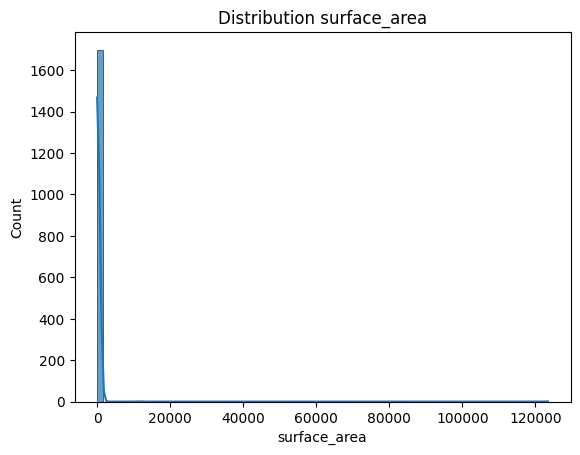

In [184]:
plt.title('Distribution surface_area')
sns.histplot(data=data_clean, x='surface_area', kde=True, alpha=0.7)
plt.show()

## Relations entre variables

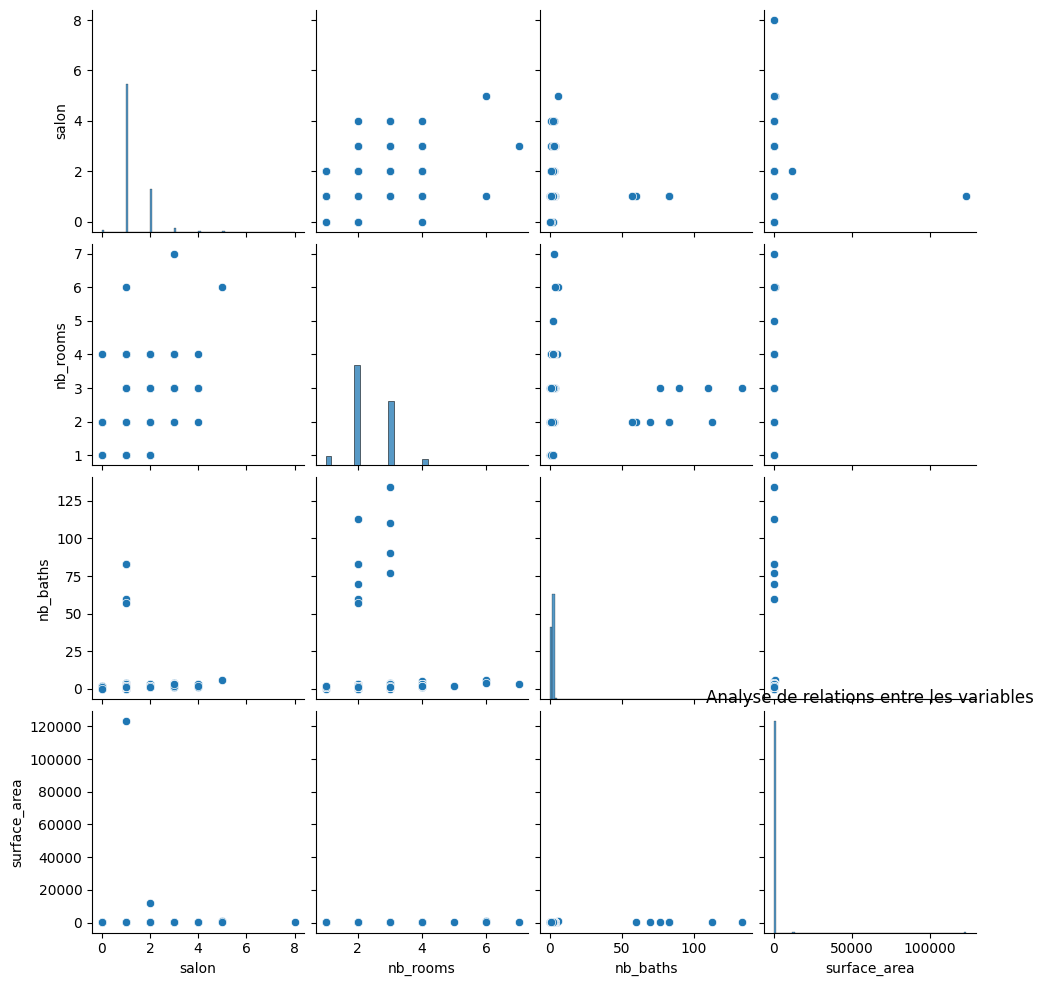

In [185]:
sns.pairplot(data_clean)
plt.title("Analyse de relations entre les variables")
plt.show()

Matrice de corrélation

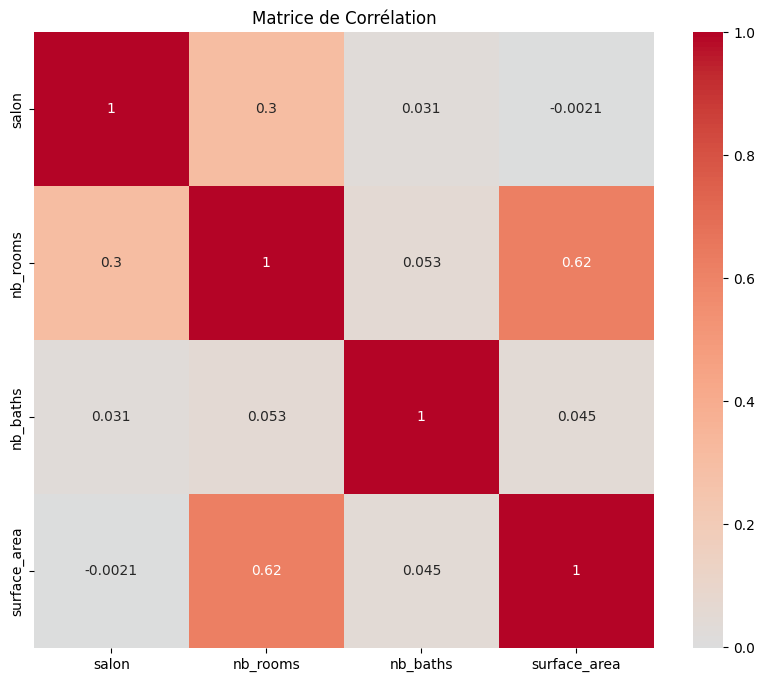

In [186]:
corr_matrix = data_clean.select_dtypes(include=np.number).corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Matrice de Corrélation')
plt.show()

## Prétraitement des données

Extraction des équipements 

In [187]:
data_clean = pd.concat([data_clean, data_clean['equipment'].str.get_dummies(sep='/')], axis=1)
data_clean.head()

,title,price,city_name,salon,nb_rooms,nb_baths,surface_area,equipment,link,Ascenseur,Balcon,Chauffage,Climatisation,Concierge,Cuisine Équipée,Duplex,Meublé,Parking,Sécurité,Terrasse
0,CMN-MA-1752 - Appartement à vendre à Palmier,2 000 000 DH,Casablanca,NaN,2.0,2.0,168.0,Ascenseur/Balcon/Parking/Terrasse,https://www.avito.ma/fr/palmier/appartements/C...,1,1,0,0,0,0,0,0,1,0,1
1,66370-Vente Appt à Casablanca Hay Hassani de 1...,1 195 000 DH,Casablanca,NaN,2.0,2.0,98.0,Ascenseur/Balcon/Chauffage/Climatisation/Cuisi...,https://www.avito.ma/fr/hay_hassani/appartemen...,1,1,1,1,0,1,0,0,1,0,0
2,Appartement à vendre 81 m² à Dar Bouazza,1 350 000 DH,Dar Bouazza,1.0,2.0,2.0,81.0,Ascenseur/Balcon/Chauffage/Climatisation/Conci...,https://www.avito.ma/fr/dar_bouazza/appartemen...,1,1,1,1,1,1,1,0,1,1,1
3,63860-Vente Appt à Casablanca Quartier Bd Med ...,900 000 DH,Casablanca,NaN,1.0,1.0,56.0,Ascenseur/Chauffage/Climatisation/Cuisine Équi...,https://www.avito.ma/fr/centre_ville/apparteme...,1,0,1,1,0,1,0,1,1,1,1
4,Appartement à Rabat Agdal,3 100 000 DH,Rabat,2.0,3.0,2.0,200.0,Ascenseur/Balcon/Concierge/Parking/Sécurité,https://www.avito.ma/fr/agdal/appartements/App...,1,1,0,0,1,0,0,0,1,1,0


Convertir la colonne price

In [188]:
data_clean['price']=data_clean['price'].str[:-2].str.replace(r'[^\d,]', '', regex=True).str.replace(',','.').replace('', pd.NA).astype(float)
data_clean.head()

,title,price,city_name,salon,nb_rooms,nb_baths,surface_area,equipment,link,Ascenseur,Balcon,Chauffage,Climatisation,Concierge,Cuisine Équipée,Duplex,Meublé,Parking,Sécurité,Terrasse
0,CMN-MA-1752 - Appartement à vendre à Palmier,2000000.0,Casablanca,NaN,2.0,2.0,168.0,Ascenseur/Balcon/Parking/Terrasse,https://www.avito.ma/fr/palmier/appartements/C...,1,1,0,0,0,0,0,0,1,0,1
1,66370-Vente Appt à Casablanca Hay Hassani de 1...,1195000.0,Casablanca,NaN,2.0,2.0,98.0,Ascenseur/Balcon/Chauffage/Climatisation/Cuisi...,https://www.avito.ma/fr/hay_hassani/appartemen...,1,1,1,1,0,1,0,0,1,0,0
2,Appartement à vendre 81 m² à Dar Bouazza,1350000.0,Dar Bouazza,1.0,2.0,2.0,81.0,Ascenseur/Balcon/Chauffage/Climatisation/Conci...,https://www.avito.ma/fr/dar_bouazza/appartemen...,1,1,1,1,1,1,1,0,1,1,1
3,63860-Vente Appt à Casablanca Quartier Bd Med ...,900000.0,Casablanca,NaN,1.0,1.0,56.0,Ascenseur/Chauffage/Climatisation/Cuisine Équi...,https://www.avito.ma/fr/centre_ville/apparteme...,1,0,1,1,0,1,0,1,1,1,1
4,Appartement à Rabat Agdal,3100000.0,Rabat,2.0,3.0,2.0,200.0,Ascenseur/Balcon/Concierge/Parking/Sécurité,https://www.avito.ma/fr/agdal/appartements/App...,1,1,0,0,1,0,0,0,1,1,0


Suppression des colonnes inutiles

In [189]:
data_clean=data_clean.drop(['equipment','link','title'],axis=1)

Traitement de la colonne city_name

In [190]:
valeurs=data_clean['city_name'].unique()
for valeur in valeurs:
    print(valeur)

Casablanca
Dar Bouazza
Rabat
Marrakech
Asilah
Bouskoura
Kénitra
Mohammedia
Agadir
Tamesna
Salé
Had Soualem
Temara
Benslimane
Tanger
Bouznika
Meknès
Fès
El Jadida
El Mansouria
Martil
الدار البيضاء
Fnideq
Tétouan
Saidia
Nouaceur
القنيطرة
Tamaris
طنجة
Cabo Negro
Sidi Allal El Bahraoui
Béni Mellal
أكادير
nan
Essaouira
Mehdia
المحمدية
Oujda
Oued Laou
Dcheira
Sidi Rahal
Deroua
مراكش
Ain Attig
Safi
الرباط
Inzegan
Ifrane
Dakhla
Dcheïra El Jihadia
Taghazout
Sidi Bouknadel
Skhirat
Khouribga
Berkane
Mers El Kheir
Berrechid
Tiznit
Agadir Melloul
Nador
El Menzeh
Bni Ansar
Mdiq
Tit Mellil
Souk El Arbaa
Biougra
Settat
Ain Aouda
Taza
Khemisset
Oued Zem
Sefrou
Merzouga
El Hajeb
Selouane
Taounate
Sidi Bennour
El Ksiba


In [191]:
map_ville={np.nan :'Unknown' ,'أكادير':'Agadir','الدار البيضاء':'Casablanca','الرباط':'Rabat','القنيطرة':'Kenitra','المحمدية':'Mohammedia','طنجة':'Tanger','مراكش':'Marrakech'}
data_clean['city_name']=data_clean['city_name'].replace(map_ville)

# Gestion des valeurs manquantes

In [96]:
data_clean.isna().sum()

price              278
city_name            0
salon              153
nb_rooms           278
nb_baths           288
surface_area        31
Ascenseur            0
Balcon               0
Chauffage            0
Climatisation        0
Concierge            0
Cuisine Équipée      0
Duplex               0
Meublé               0
Parking              0
Sécurité             0
Terrasse             0
dtype: int64

In [97]:
median_by_city = data_clean.groupby('city_name')['price'].transform('median')
data_clean['price'] = data_clean['price'].fillna(median_by_city).fillna(data_clean['price'].median())

In [98]:
data_clean['salon'] = data_clean['salon'].fillna(data_clean['salon'].median())
data_clean['nb_rooms'] = data_clean['nb_rooms'].fillna(data_clean['nb_rooms'].median())
data_clean['nb_baths'] = data_clean['nb_baths'].fillna(data_clean['nb_baths'].median())
data_clean['surface_area'] = data_clean['surface_area'].fillna(data_clean['surface_area'].median())

In [99]:
data_clean.isna().sum()

price              0
city_name          0
salon              0
nb_rooms           0
nb_baths           0
surface_area       0
Ascenseur          0
Balcon             0
Chauffage          0
Climatisation      0
Concierge          0
Cuisine Équipée    0
Duplex             0
Meublé             0
Parking            0
Sécurité           0
Terrasse           0
dtype: int64

## Détection et suppression des valeurs aberrantes

### Price

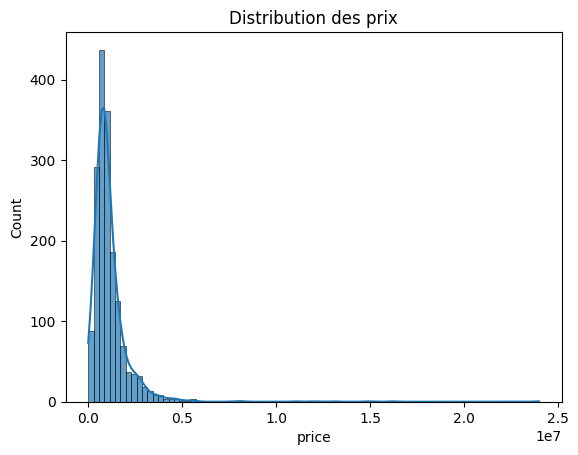

In [100]:
plt.title('Distribution des prix')
sns.histplot(data=data_clean, x='price', kde=True, alpha=0.7)
plt.show()

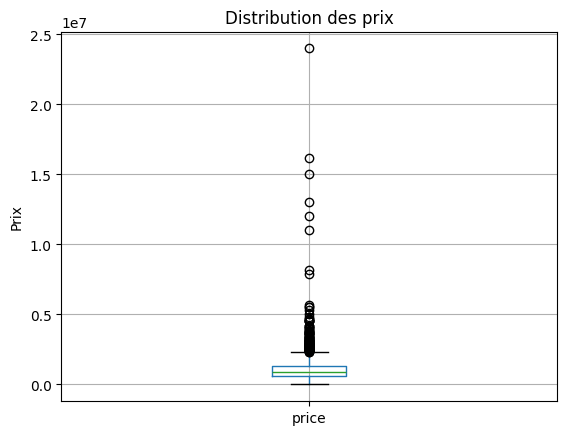

In [101]:
data_clean.boxplot(column=['price'])
plt.title('Distribution des prix')
plt.ylabel('Prix')
plt.show()

On check nos valeurs min et max pour les prix pour detecter les possibles valeurs abérrantes

In [102]:
print(data_clean['price'].max())
print(data_clean['price'].min())

24000000.0
35.0


Effectivement 35 DH de minimum est abérrant pour le prix d'un bien immobilier

On calcul notre limite sup avec la méthode des quantiles

In [103]:
seuil_sup_price = data_clean['price'].quantile(0.75)+1.5*(data_clean['price'].quantile(0.75)-data_clean['price'].quantile(0.25))
print(seuil_sup_price)

2326250.0


Sur l'histogramme de la distribution des prix on remarque un skew sur la droite sur les grandes valeurs

In [104]:
data_sup_price= data_clean[data_clean['price'] > 10000000]
data_sup_price.shape

(6, 17)

Je decide de supprimer les prix supérieur à 10 000 000 car trés peu de donnéées et peuvent pénaliser mon modèle. Il n'y a que 6 lignes donc ne diminuera pas beaucoup la taille de mes datas.

In [105]:
data_c1= data_clean[data_clean['price'] < 100000]
data_c1.shape

(54, 17)

Je decide d'enlever les prix inferieur à 100 000 car aberrant pour des prix de biens immobiliers.

In [106]:
data_clean=data_clean[data_clean['price']  >100000]

In [107]:
data_clean=data_clean[data_clean['price']  <10000000]

In [108]:
print (f"Mes prix se situe maintenant entre {data_clean['price'].min()} et {data_clean['price'].max()}")

Mes prix se situe maintenant entre 105000.0 et 8150000.0


### Salon

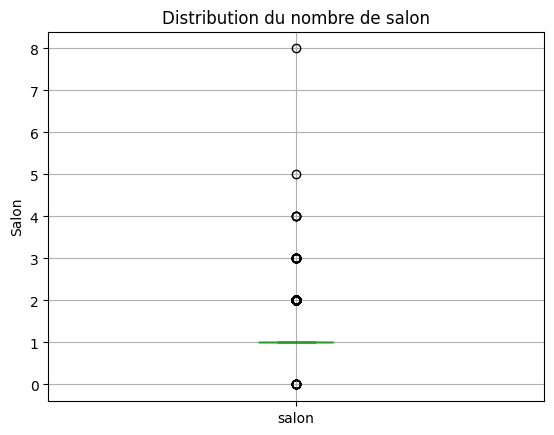

In [109]:
data_clean.boxplot(column=['salon'])
plt.title('Distribution du nombre de salon')
plt.ylabel('Salon')
plt.show()

In [110]:
seuil_sup_salon = data_clean['salon'].quantile(0.75)+1.5*(data_clean['salon'].quantile(0.75)-data_clean['salon'].quantile(0.25))
print(seuil_sup_salon)

1.0


In [111]:
data_sup_salon = data_clean[data_clean['salon'] > seuil_sup_salon]
data_sup_salon.shape

(370, 17)

Je decide de ne retirer que 8 comme valeur abérente car il y a trop de lignes à supprimer et dans les grandes maisons marocaines il peut y avoir jusqu'à cinq salons.

In [112]:
data_clean=data_clean[data_clean['salon'] < 8]

### Nb rooms

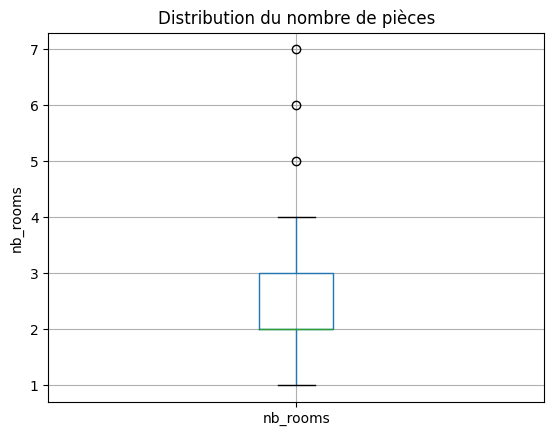

In [113]:
data_clean.boxplot(column=['nb_rooms'])
plt.title('Distribution du nombre de pièces')
plt.ylabel('nb_rooms')
plt.show()

In [114]:
seuil_sup_room = data_clean['nb_rooms'].quantile(0.75)+1.5*(data_clean['nb_rooms'].quantile(0.75)-data_clean['nb_rooms'].quantile(0.25))
print(seuil_sup_room)

4.5


In [115]:
data_sup_room = data_clean[data_clean['nb_rooms'] > seuil_sup_room]
data_sup_room.shape

(3, 17)

In [116]:
data_clean=data_clean[data_clean['nb_rooms'] <= seuil_sup_room]

### Nb baths

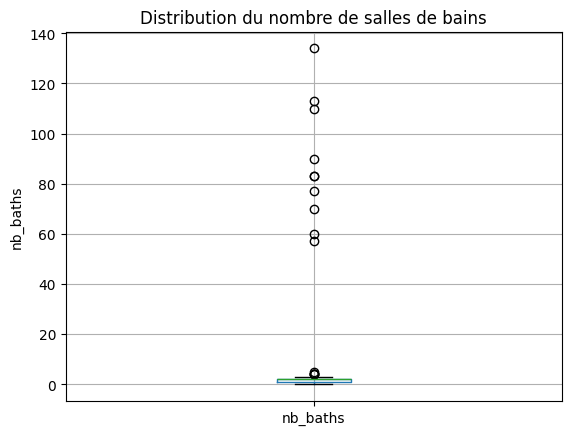

In [117]:
data_clean.boxplot(column=['nb_baths'])
plt.title('Distribution du nombre de salles de bains')
plt.ylabel('nb_baths')
plt.show()

In [118]:
seuil_sup_baths = data_clean['nb_baths'].quantile(0.75)+1.5*(data_clean['nb_baths'].quantile(0.75)-data_clean['nb_baths'].quantile(0.25))
print(seuil_sup_baths)

3.5


In [119]:
data_sup_baths = data_clean[data_clean['nb_baths'] > seuil_sup_baths]
data_sup_baths.shape

(15, 17)

J'enlève les lignes avec plus de 4 sdb

In [120]:
data_clean=data_clean[data_clean['nb_baths'] <= seuil_sup_baths]

### surface_area

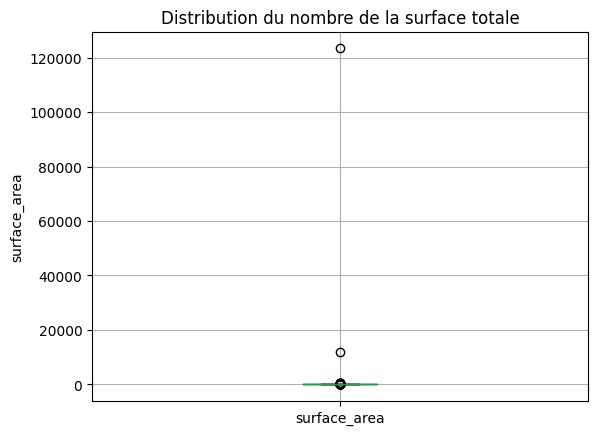

In [121]:
data_clean.boxplot(column=['surface_area'])
plt.title('Distribution du nombre de la surface totale')
plt.ylabel('surface_area')
plt.show()

In [122]:
print(data_clean['surface_area'].min())
print(data_clean['surface_area'].max())

1.0
123456.0


In [123]:
seuil_sup_area = data_clean['surface_area'].quantile(0.75)+1.5*(data_clean['surface_area'].quantile(0.75)-data_clean['surface_area'].quantile(0.25))
print(seuil_sup_area)

176.0


In [124]:
data_sup_area = data_clean[data_clean['surface_area'] > seuil_sup_area]
data_sup_area.shape

(62, 17)

In [125]:
data_sup_area = data_clean[data_clean['surface_area'] < 10]
data_sup_area.shape

(4, 17)

J'enlève le lignes avec des surfaces inférieur à 10 m2

In [126]:
data_clean=data_clean[data_clean['surface_area'] > 10]

Jeu de données aprés suppression des variables aberrantes et des doublons

In [127]:
data_clean.shape
nb_lignes_fin=data_clean.shape[0]
print(nb_lignes_fin)

1648


In [128]:
print(nb_lignes_init-nb_lignes_fin)

125


In [129]:
print(f"On a retiré {nb_lignes_init-nb_lignes_fin} valeurs entre les doublons et les valeurs aberrantes soit {((nb_lignes_init-nb_lignes_fin)/nb_lignes_init*100):.0f}% des données dont {doublons} doublons")

On a retiré 125 valeurs entre les doublons et les valeurs aberrantes soit 7% des données dont 41 doublons


## Encodage des variables catégorielles

In [130]:
# Calcul de la moyenne des prix par ville
ville_means = data_clean.groupby('city_name')['price'].mean().to_dict()

# Lissage (pour éviter l'overfitting sur les villes rares)
global_mean = data_clean['price'].mean()
data_clean['ville_encoded'] = data_clean['city_name'].map(
    lambda x: 0.7 * ville_means.get(x, global_mean) + 0.3 * global_mean)

In [131]:
# Calcul du nombre de biens par ville
ville_nombre = data_clean.groupby('city_name')['price'].count().to_dict()

data_clean['ville_nb'] = data_clean['city_name'].map(ville_nombre)

In [132]:
print(data_clean[['city_name', 'ville_encoded','ville_nb']])

        city_name  ville_encoded  ville_nb
0      Casablanca   1.220299e+06       588
1      Casablanca   1.220299e+06       588
2     Dar Bouazza   1.260745e+06        15
3      Casablanca   1.220299e+06       588
4           Rabat   1.641735e+06        81
...           ...            ...       ...
1765       Meknès   6.984012e+05        23
1767       Tanger   1.120290e+06        97
1768       Agadir   1.084227e+06        89
1769       Agadir   1.084227e+06        89
1770       Temara   1.180962e+06        80

[1648 rows x 3 columns]


Ajout de variables

In [133]:
data_clean['equipement_tot']=data_clean['Ascenseur']+data_clean['Balcon']+data_clean['Chauffage']
+data_clean['Climatisation']+data_clean['Concierge']+data_clean['Cuisine Équipée']+data_clean['Duplex']+data_clean['Meublé']
+data_clean['Parking']+data_clean['Sécurité']+data_clean['Terrasse']

0       2
1       1
2       3
3       3
4       2
       ..
1765    2
1767    0
1768    2
1769    1
1770    2
Length: 1648, dtype: int64

In [134]:
data_clean['nb_tot']=data_clean['salon']+data_clean['nb_rooms']+data_clean['nb_baths']

In [135]:
# Calcul de la moyenne du prix au m2
ville_means_per_m2 = (data_clean['price'] / data_clean['surface_area']).groupby(data_clean['city_name']).mean().to_dict()

# Moyenne globale du prix au m2
global_mean_per_m2 = (data_clean['price'] / data_clean['surface_area']).mean()

# Encodage lissé
data_clean['ville_encoded_m2'] = data_clean['city_name'].map(
    lambda x: 0.7 * ville_means_per_m2.get(x, global_mean_per_m2) + 0.3 * global_mean_per_m2
)

### Transformation log

Je souhaite visualiser la transformation log la distribution de mes prix

In [136]:
data_clean['log_price'] = np.log(data_clean['price'])

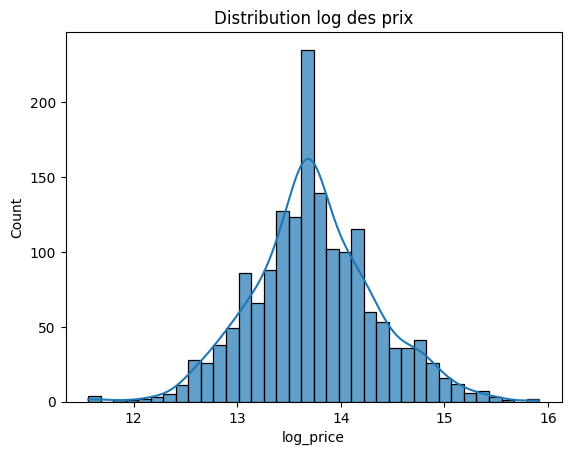

In [137]:
plt.title('Distribution log des prix')
sns.histplot(data=data_clean, x='log_price', kde=True, alpha=0.7)
plt.show()

On remarque que la distribution n'est plus skewé vers la droite er ressemble plus à une distribution normale

## Export vers sql

J'exporte ma table vers sql pour travailler sur mes modèles dans d'autres fichiers

In [138]:
import psycopg2
from psycopg2 import sql
from dotenv import load_dotenv
import os
from sqlalchemy import create_engine

In [139]:
load_dotenv()

True

In [140]:
user = os.getenv("PGUSER")
password = os.getenv("PGPASSWORD")
host = os.getenv("PGHOST")
port = os.getenv("PGPORT")
database = os.getenv("PGDATABASE")

engine = create_engine(f'postgresql+psycopg2://{user}:{password}@{host}:{port}/{database}')

In [ ]:
data_clean.to_sql('immo', engine, if_exists='append', index=False)

## Sélection des variables explicatives

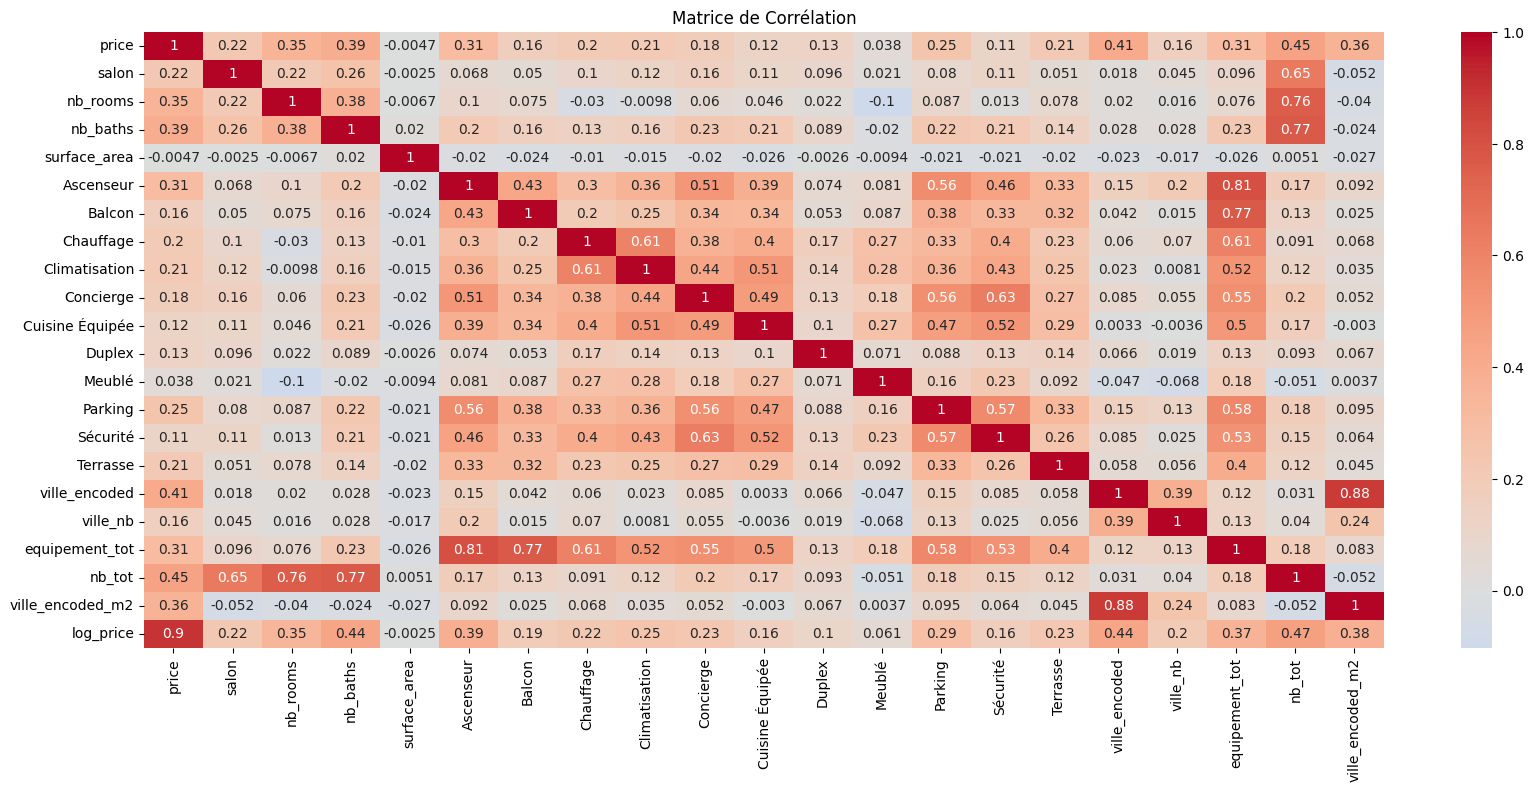

In [142]:
corr_matrix = data_clean.select_dtypes(include=np.number).corr()
corr_matrix = corr_matrix.drop('log_price', axis=1)
plt.figure(figsize=(20, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Matrice de Corrélation')
plt.show()

Choix des variables numériques corrélées au prix (corr > 0.15):

In [143]:
price_correlations = corr_matrix['price'].abs()
colonnes_selectionnees = price_correlations[price_correlations > 0.15].index.tolist()
print(colonnes_selectionnees)

['price', 'salon', 'nb_rooms', 'nb_baths', 'Ascenseur', 'Balcon', 'Chauffage', 'Climatisation', 'Concierge', 'Parking', 'Terrasse', 'ville_encoded', 'ville_nb', 'equipement_tot', 'nb_tot', 'ville_encoded_m2', 'log_price']


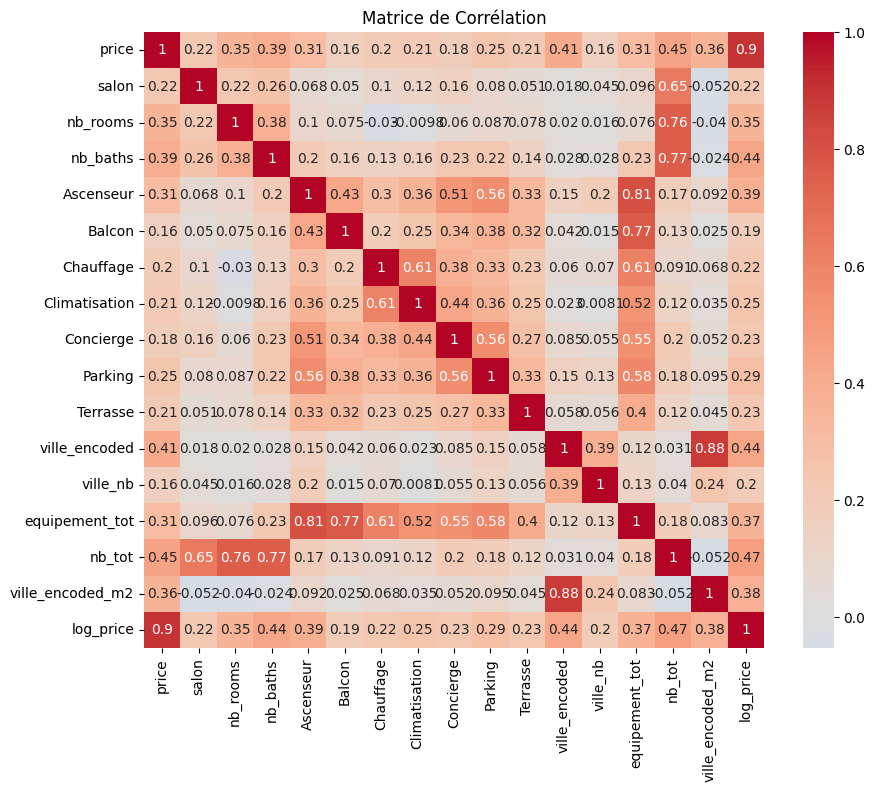

In [144]:
corr_matrix = data_clean[colonnes_selectionnees].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Matrice de Corrélation')
plt.show()